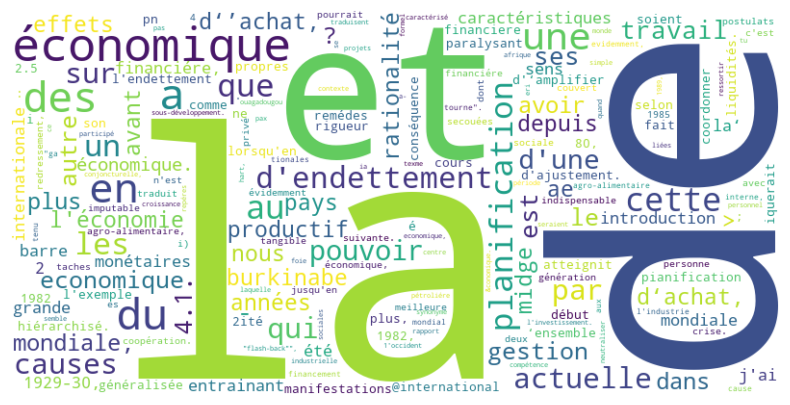

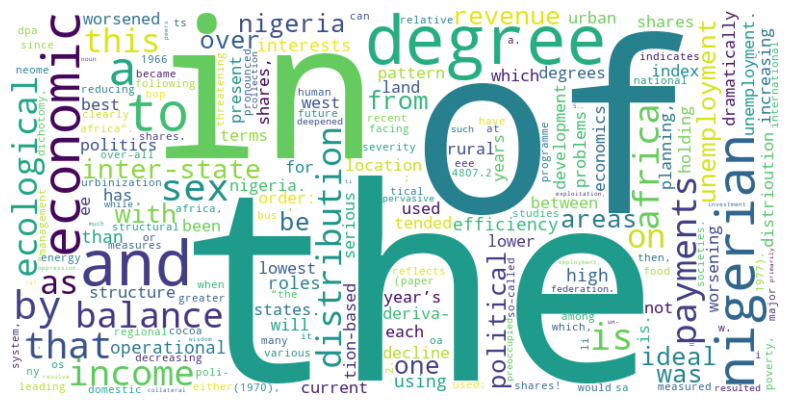

In [3]:
import os, PyPDF2
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

folder_paths = ['./CEDRES', './NJESS']
keywords_en = ['crisis', 'inequality']
keywords_fr = ['crise', 'inégalité']
window_size = 3

def extract_text_from_pdf(pdf_file_path):
    pdf_text = ""
    with open(pdf_file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            pdf_text += page.extract_text()
    return pdf_text

for i in range(2):
    neighbor_word_counts = Counter()
    keywords = keywords_en if i == 1 else keywords_fr

    for filename in os.listdir(folder_paths[i]):
        if filename.endswith('.pdf'):
            pdf_file_path = os.path.join(folder_paths[i], filename)
            text = extract_text_from_pdf(pdf_file_path).lower()
            words = text.split()
            neighboring_words = []

        for index, word in enumerate(words):
            if word in keywords:
                start = max(0, index - window_size)
                end = min(len(words), index + window_size + 1)
                neighboring_words.extend([words[i] for i in range(start, end) if i != index])
                neighbor_word_counts += Counter(neighboring_words)
                
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighbor_word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


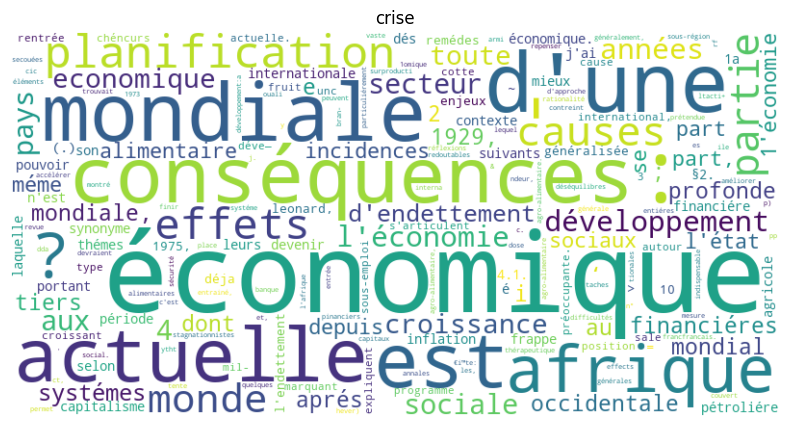

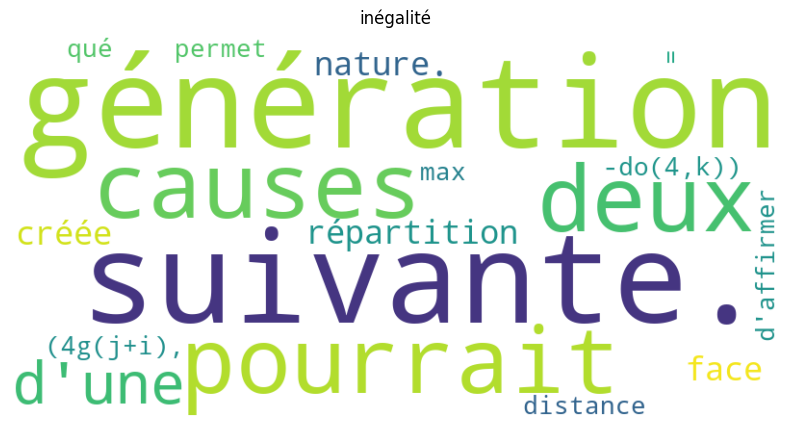

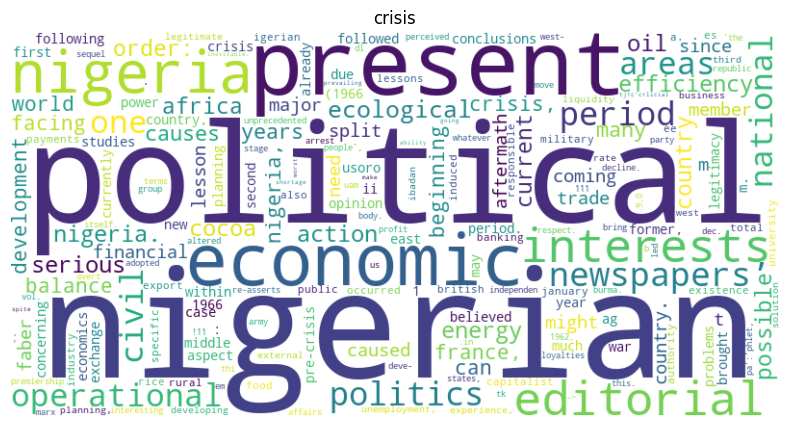

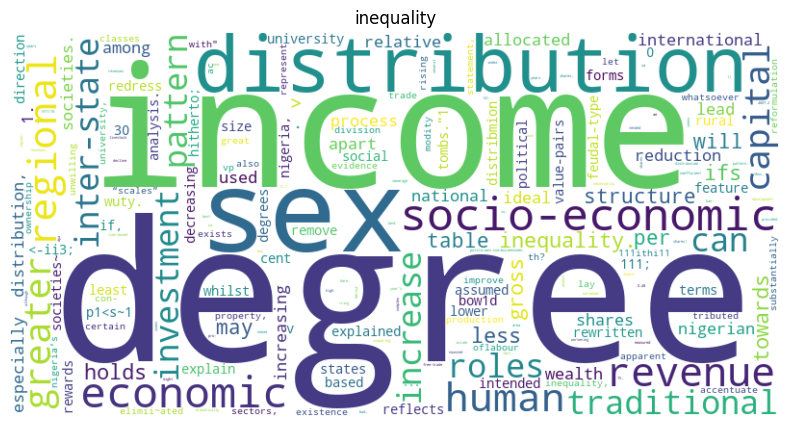

In [7]:
import pickle, matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

window_size = 5
keywords_en = ['crisis', 'inequality']
keywords_fr = ['crise', 'inégalité']
fr_stop = ["à", 'a', 'une', "ai", "ainsi", "après", "assez", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "cet", "cette", "comme", "comment", "dans", "de", "des", "du", "donc", "dos", "elle", "en", "encore", "entre", "et", "eux", "fait", "font", "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "mais", "me", "même", "mes", "moi", "mon", "ne", "ni", "nos", "notre", "nous", "on", "ont", "ou", "où", "par", "parce", "pas", "peu", "peut", "plus", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", "sa", "sans", "ses", "seul", "si", "soit", "sont", "sous", "sur", "ta", "te", "tes", "toi", "ton", "tous", "tout", "trop", "très", "tu", "un", "une", "va", "vos", "votre", "vous", "vu"]
en_stop = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

with open('CEDRES.pickle', 'rb') as file:
    neighbor_word_counts1 = Counter()
    neighboring_words1 = []
    neighbor_word_counts2 = Counter()
    neighboring_words2 = []
    text = pickle.load(file)
    text = text.lower()
    words = text.split()

    for index, word in enumerate(words):
        if word == keywords_fr[0]:
            start = max(0, index - window_size)
            end = min(len(words), index + window_size + 1)
            neighboring_words1.extend([words[i] for i in range(start, end) if i != index and words[i] not in fr_stop])
            neighbor_word_counts1 += Counter(neighboring_words1)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighbor_word_counts1)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('crise')
    plt.axis('off')
    plt.show()

    for index, word in enumerate(words):
        if word == keywords_fr[1]:
            start = max(0, index - window_size)
            end = min(len(words), index + window_size + 1)
            neighboring_words2.extend([words[i] for i in range(start, end) if i != index and words[i] not in fr_stop])
            neighbor_word_counts2 += Counter(neighboring_words2)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighbor_word_counts2)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('inégalité')
    plt.axis('off')
    plt.show()


with open('NJESS.pickle', 'rb') as file:
    neighbor_word_counts3 = Counter()
    neighboring_words3 = []
    neighbor_word_counts4 = Counter()
    neighboring_words4 = []
    text = pickle.load(file)
    text = text.lower()
    words = text.split()

    for index, word in enumerate(words):
        if word == keywords_en[0]:
            start = max(0, index - window_size)
            end = min(len(words), index + window_size + 1)
            neighboring_words3.extend([words[i] for i in range(start, end) if i != index and words[i] not in en_stop])
            neighbor_word_counts3 += Counter(neighboring_words3)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighbor_word_counts3)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('crisis')
    plt.axis('off')
    plt.show()

    for index, word in enumerate(words):
        if word == keywords_en[1]:
            start = max(0, index - window_size)
            end = min(len(words), index + window_size + 1)
            neighboring_words4.extend([words[i] for i in range(start, end) if i != index and words[i] not in en_stop])
            neighbor_word_counts4 += Counter(neighboring_words4)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighbor_word_counts4)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('inequality')
    plt.axis('off')
    plt.show()

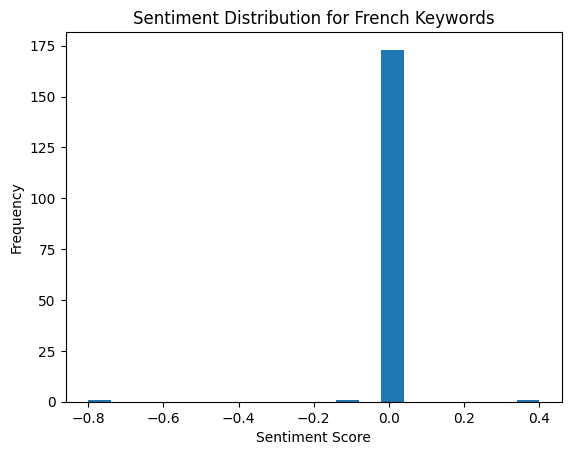

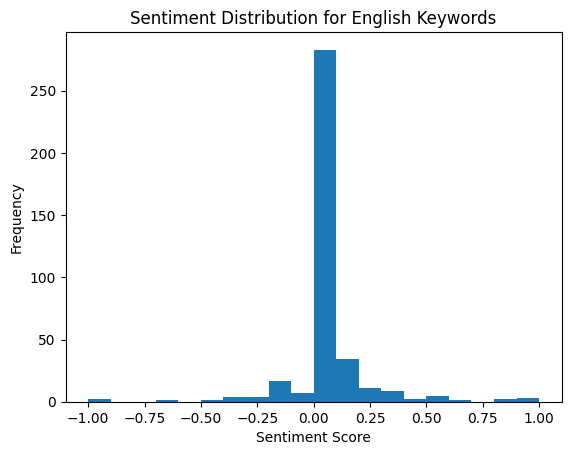

In [3]:
import pickle, matplotlib.pyplot as plt
from textblob import TextBlob

window_size = 5
keywords_en = ['crisis', 'inequality']
keywords_fr = ['crise', 'inégalité']
fr_stop = ["à", 'est', 'a', 'une', "ai", "ainsi", "après", "assez", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "cet", "cette", "comme", "comment", "dans", "de", "des", "du", "donc", "dos", "elle", "en", "encore", "entre", "et", "eux", "fait", "font", "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "mais", "me", "même", "mes", "moi", "mon", "ne", "ni", "nos", "notre", "nous", "on", "ont", "ou", "où", "par", "parce", "pas", "peu", "peut", "plus", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", "sa", "sans", "ses", "seul", "si", "soit", "sont", "sous", "sur", "ta", "te", "tes", "toi", "ton", "tous", "tout", "trop", "très", "tu", "un", "une", "va", "vos", "votre", "vous", "vu"]
en_stop = ['crisis', 'inequality', "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

with open('CEDRES.pickle', 'rb') as file:
    text = pickle.load(file)
    text = text.lower()
    words = text.split()
    sentiments = []

    for index, word in enumerate(words):
        if word in keywords_fr:
            start = max(0, index - window_size)
            end = min(len(words), index + window_size + 1)
            context = " ".join([item for item in words[start:end] if item not in fr_stop])
            sentiment = TextBlob(context).sentiment.polarity
            sentiments.append(sentiment)

    plt.hist(sentiments, bins=20)
    plt.title('Sentiment Distribution for French Keywords')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()


with open('NJESS.pickle', 'rb') as file:
    text = pickle.load(file)
    text = text.lower()
    words = text.split()
    sentiments = []

    for index, word in enumerate(words):
        if word in keywords_en:
            start = max(0, index - window_size)
            end = min(len(words), index + window_size + 1)
            context = " ".join([item for item in words[start:end] if item not in en_stop])
            sentiment = TextBlob(context).sentiment.polarity
            sentiments.append(sentiment)

    plt.hist(sentiments, bins=20)
    plt.title('Sentiment Distribution for English Keywords')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()